<a href="https://colab.research.google.com/github/canaytsr/GlobalAIHubMachineLearningCourse/blob/main/Final%20Project/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Final Project**
In this project, our aim is to building a model for predicting dimond prices. Our label (output) will be price column. 
Do not forget, this is a Classification problem!

# **Content**

carat: weight of the diamond (0.2--5.01)

cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color: diamond colour, from J (worst) to D (best)

clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x: length in mm (0--10.74)

y: width in mm (0--58.9)

z: depth in mm (0--31.8)

depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table: width of top of diamond relative to widest point (43--95)

# **Steps**

* Read the diamonds.csv file and describe it.
* Make at least 4 different analysis on Exploratory Data Analysis section.
* Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
* Define appropriate evaluation metric for our case (classification). Hint: Is there any imbalanced problem in the label column?
* Split the dataset into train and test set. (Consider the imbalanced problem if is there any). Check the distribution of labels in the subsets (train and test).
* Train and evaluate Decision Trees and at least 2 different appropriate algorithm which you can choose from scikit-learn library.
* Is there any overfitting and underfitting? Interpret your results and try to overcome if there is any problem in a new section.
* Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
* Analyse and compare results of 3 algorithms.
* Select best performing model based on evaluation metric you chose on test dataset.
Good luck :)

## **CANAY TAŞAR**


#**DATA**

In [456]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Read csv

data = pd.read_csv('https://raw.githubusercontent.com/canaytsr/GlobalAIHubMachineLearningCourse/main/Final%20Project/dimonds.csv')
d_set=data.copy()
data.head



<bound method NDFrame.head of        index  carat        cut color clarity  ...  table     x     y     z     price
0          1   0.23      Ideal     E     SI2  ...   55.0  3.95  3.98  2.43  Very Low
1          2   0.21    Premium     E     SI1  ...   61.0  3.89  3.84  2.31  Very Low
2          3   0.23       Good     E     VS1  ...   65.0  4.05  4.07  2.31  Very Low
3          4   0.29    Premium     I     VS2  ...   58.0  4.20  4.23  2.63  Very Low
4          5   0.31       Good     J     SI2  ...   58.0  4.34  4.35  2.75  Very Low
...      ...    ...        ...   ...     ...  ...    ...   ...   ...   ...       ...
53935  53936   0.72      Ideal     D     SI1  ...   57.0  5.75  5.76  3.50  Very Low
53936  53937   0.72       Good     D     SI1  ...   55.0  5.69  5.75  3.61  Very Low
53937  53938   0.70  Very Good     D     SI1  ...   60.0  5.66  5.68  3.56  Very Low
53938  53939   0.86    Premium     H     SI2  ...   58.0  6.15  6.12  3.74  Very Low
53939  53940   0.75      Ideal     

In [315]:
print("Cut: ",set(data["cut"]))
print("Color: ",set(data["color"]))
print("Clarity: ",set(data["clarity"]))

Cut:  {'Ideal', 'Premium', 'Fair', 'Good', 'Very Good'}
Color:  {'D', 'F', 'I', 'J', 'G', 'H', 'E'}
Clarity:  {'VVS1', 'SI2', 'VS1', 'I1', 'VVS2', 'IF', 'SI1', 'VS2'}


In [317]:
# Describe our data for each feature and use .info() for get information about our dataset
# Analyse missing values

print(data.describe())
print(data.info())
print(data.dropna())
print(data.isnull().sum())



              index         carat  ...             y             z
count  53940.000000  53940.000000  ...  53940.000000  53940.000000
mean   26970.500000      0.797940  ...      5.734526      3.538734
std    15571.281097      0.474011  ...      1.142135      0.705699
min        1.000000      0.200000  ...      0.000000      0.000000
25%    13485.750000      0.400000  ...      4.720000      2.910000
50%    26970.500000      0.700000  ...      5.710000      3.530000
75%    40455.250000      1.040000  ...      6.540000      4.040000
max    53940.000000      5.010000  ...     58.900000     31.800000

[8 rows x 7 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    53940 non-null  int64  
 1   carat    53940 non-null  float64
 2   cut      53940 non-null  object 
 3   color    53940 non-null  object 
 4   clarity  53940 non-null  object 


In [428]:
data.isnull().values.any()

False

# **Exploratory Data Analysis**

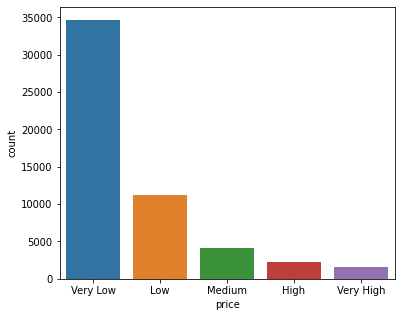

In [318]:
# Our label Distribution (countplot)

from plotly.offline import iplot
import plotly.graph_objs as go
from pandas.plotting import scatter_matrix

plt.figure(figsize=(6, 5))
sns.countplot(x ='price', data = data)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



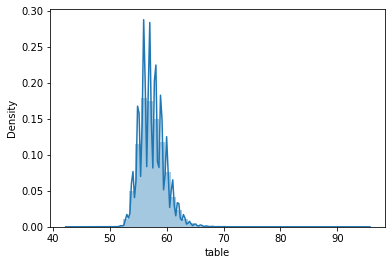

In [319]:
# Example EDA (distplot)
sns.distplot(data['table'])             
plt.show()

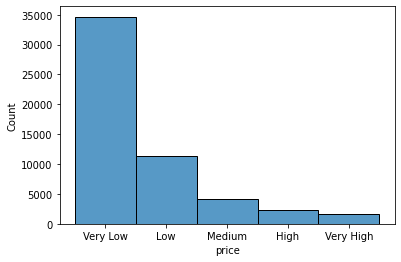

In [320]:
sns.histplot(data['price'])             
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



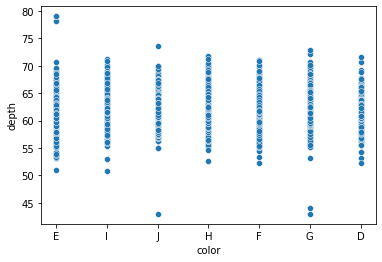

In [322]:
#EDA using scatterplot
sns.scatterplot("color","depth",data=data);

In [323]:
data.groupby(by="carat").count()

,index,cut,color,clarity,depth,table,x,y,z,price
carat,,,,,,,,,,
0.20,12,12,12,12,12,12,12,12,12,12
0.21,9,9,9,9,9,9,9,9,9,9
0.22,5,5,5,5,5,5,5,5,5,5
0.23,293,293,293,293,293,293,293,293,293,293
0.24,254,254,254,254,254,254,254,254,254,254
...,...,...,...,...,...,...,...,...,...,...
4.00,1,1,1,1,1,1,1,1,1,1
4.01,2,2,2,2,2,2,2,2,2,2
4.13,1,1,1,1,1,1,1,1,1,1


# **Preprocessing**

Are there any duplicated values?

Do we need to do feature scaling?

Do we need to generate new features?

Split dataset into train and test sets. (0.7/0.3)

In [324]:
#Are there any duplicated values?
data.drop_duplicates()

,index,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,Very Low
1,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,Very Low
2,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,Very Low
3,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,Very Low
4,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,Very Low
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,Very Low
53936,53937,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,Very Low
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,Very Low
53938,53939,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,Very Low


In [325]:
column_names = ['index','carat','cut','color','clarity','depth', 'table','x', 'y', 'z','price','quality']

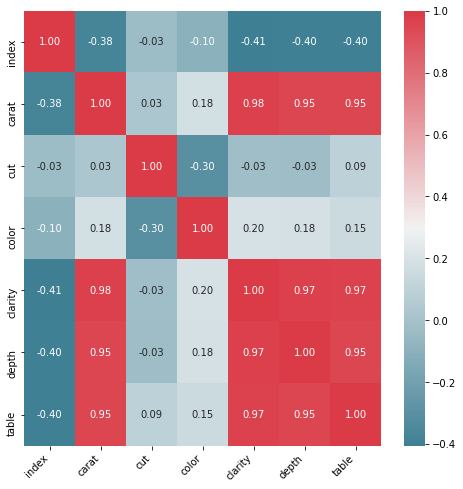

In [326]:
# Correlation of the features
correlations = data.corr()
fig, ax = plt.subplots(figsize=(8, 8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(correlations, cmap=colormap, annot=True, fmt=".2f")
ax.set_xticklabels(column_names,rotation=45, horizontalalignment='right');
ax.set_yticklabels(column_names);
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



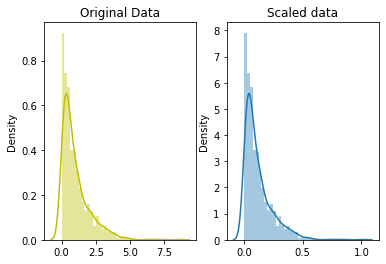

In [377]:
from sklearn.preprocessing import minmax_scale
from sklearn.utils import resample

np.random.seed(0)
original_data = np.random.exponential(size = 1000)
scaled_data = minmax_scale(original_data)

fig, ax=plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0], color='y')
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")
plt.show()

In [403]:
bins = (0,2,6)
group_names = ['bad','good']
data['carat'] = pd.cut(data['carat'], bins = bins, labels = group_names)
data.head(10)

,index,carat,cut,color,clarity,depth,table,price,volume,diamond score
0,1,bad,0.0,0.0,0.0,61.5,55.0,Very Low,38.202030,0.0
1,2,bad,0.0,0.0,0.0,59.8,61.0,Very Low,34.505856,0.0
2,3,bad,0.0,0.0,0.0,56.9,65.0,Very Low,38.076885,0.0
3,4,bad,0.0,0.0,0.0,62.4,58.0,Very Low,46.724580,0.0
4,5,bad,0.0,0.0,0.0,63.3,58.0,Very Low,51.917250,0.0
5,6,bad,0.0,0.0,0.0,62.8,57.0,Very Low,38.693952,0.0
6,7,bad,0.0,0.0,0.0,62.3,57.0,Very Low,38.830870,0.0
7,8,bad,0.0,0.0,0.0,61.9,55.0,Very Low,42.321081,0.0
8,9,bad,0.0,0.0,0.0,65.1,61.0,Very Low,36.425214,0.0
9,10,bad,0.0,0.0,0.0,59.4,61.0,Very Low,38.718000,0.0


In [378]:
from sklearn.preprocessing import LabelEncoder

label_carat = LabelEncoder()
data['carat'] = label_carat.fit_transform(data['carat'])
data['carat'].value_counts()


10     2604
11     2249
81     2242
50     1981
12     1840
       ... 
260       1
262       1
243       1
272       1
244       1
Name: carat, Length: 273, dtype: int64

In [331]:
X = data.drop('carat', axis=1)
y = data['carat']

In [382]:
#Split dataset into train and test sets. (0.7/0.3)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7, test_size=0.3)
X_test

,index,cut,color,clarity,depth,table,x,y,z,price
19222,19223,3,1,7,59.1,60.0,7.12,7.17,4.22,NaN
6347,6348,2,6,3,57.4,59.0,6.61,6.53,3.77,NaN
5549,5550,2,6,8,63.6,56.0,6.40,6.37,4.06,326.0
27639,27640,5,7,6,62.1,58.0,8.54,8.49,5.29,NaN
11868,11869,1,6,7,62.4,57.0,6.71,6.75,4.20,NaN
...,...,...,...,...,...,...,...,...,...,...
27425,27426,3,5,8,63.6,58.0,8.51,8.59,5.44,NaN
28940,28941,2,5,1,63.3,59.0,4.22,4.28,2.69,326.0
23707,23708,2,7,4,63.4,58.0,4.61,4.64,2.93,326.0
18800,18801,3,4,3,62.9,56.0,6.56,6.60,4.14,NaN


In [383]:
#Standardization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform (X_test)

# **ML Application**
* Define models.
* Fit models.
* Evaluate models for both train and test dataset.
* Generate Confusion Matrix and scores of Accuracy, Recall, Precision and * F1-Score.
* nalyse occurrence of overfitting and underfitting. If there is any of them, try to overcome it within a different section.

In [457]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn import model_selection
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import MinMaxScaler
sns.set_palette("husl")

import warnings
warnings.filterwarnings('ignore')

In [459]:
del data[data.columns[0]]
d_set.rename(columns={"x": "length", "y": "width", "z" : "depth","depth" : "depth %", "table": "table %"},inplace = True)
d_set.head(1)

,index,carat,cut,color,clarity,depth %,table %,length,width,depth,price
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,Very Low


In [476]:
d_set['L/W'] = d_set['length']/d_set['width']
print(d_set.info())
print(d_set.shape)
print(d_set.head())
print(d_set.tail())
print(d_set['cut'].unique().tolist())
print(d_set['clarity'].unique().tolist())
print(d_set['color'].unique().tolist())
print(d_set.describe())
print(d_set.loc[(d_set['length'] == 0) | (d_set['width'] == 0) | (d_set['depth'] == 0) | (d_set['L/W'] == 0)] )
print('length :',len(d_set.loc[(d_set['length'] == 0) | (d_set['width'] == 0) | (d_set['depth'] == 0) | (d_set['L/W'] == 0)]))


d_set[['length','width','depth','L/W']]=d_set[['length','width','depth','L/W']].replace(0,np.NaN)

d_set.dropna(inplace=True)

d_set.loc[(d_set['length'] == 0) | (d_set['width'] == 0) | (d_set['depth'] == 0) | (d_set['L/W'] == 0) ]


print(d_set.isnull().sum())
print('shape:',d_set.shape)


d_set['clarity_score']=d_set['clarity'].replace(['IF','VVS1','VVS2','VS1','VS2','SI1','SI2','I1'],[8,7,6,5,4,3,2,1])
d_set['color_score'] = d_set['color'].replace(['D','E','F','G','H','I','J'],[7,6,5,4,3,2,1])
d_set['cut_score'] = d_set['cut'].replace(['Ideal','Premium','Very Good','Good','Fair'],[5,4,3,2,1])

print(d_set.head())
data_score = d_set.copy()

X = pd.DataFrame(data_score,columns =['carat','cut_score','clarity_score','color_score','table %','depth %','L/W','depth','length','width'])
Y = pd.DataFrame(data_score,columns =['price'])



X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=10)


lin = LinearRegression()
dlin.fit(X_train, Y_train)
y_pred = dlin.predict(X_test)
print('####### Linear Regression #######')
print('Score : ' , dlin.score(X_test, Y_test))
mse = mean_squared_error(Y_test,y_pred)
r2 = r2_score(Y_test, y_pred)
print('')
print('MSE    :  ' ,mse)
print('R2     :  ' , r2)
n=X_test.shape[0]
p=X_test.shape[1]
adj_rsquared = 1 - (1 - r2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))




<class 'pandas.core.frame.DataFrame'>
Int64Index: 53920 entries, 0 to 53939
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          53920 non-null  int64  
 1   carat          53920 non-null  float64
 2   cut            53920 non-null  object 
 3   color          53920 non-null  object 
 4   clarity        53920 non-null  object 
 5   depth %        53920 non-null  float64
 6   table %        53920 non-null  float64
 7   length         53920 non-null  float64
 8   width          53920 non-null  float64
 9   depth          53920 non-null  float64
 10  price          53920 non-null  object 
 11  L/W            53920 non-null  float64
 12  clarity_score  53920 non-null  int64  
 13  color_score    53920 non-null  int64  
 14  cut_score      53920 non-null  int64  
dtypes: float64(7), int64(4), object(4)
memory usage: 6.6+ MB
None
(53920, 15)
   index  carat      cut color  ...       L/W  clarity_score  co

ValueError: ignored

In [427]:
d_set.sample(3)
d_set['volume'] = d_set['x']*d_set['y']*d_set['z']

d_set.drop(['x','y','z'],axis=1,inplace=True)
d_set = d_set[d_set['volume']<1000]
print(d_set.columns)


d_set['cut'] = d_set['cut'].apply(lambda x: 1 if x=='Fair' else(2 if x=='Good' 
                                           else(3 if x=='Very Good' 
                                           else(4 if x=='Premium' else 5))))

d_set['color'] = d_set['color'].apply(lambda x: 1 if x=='J' else(2 if x=='I'
                                          else(3 if x=='H'
                                          else(4 if x=='G'
                                          else(5 if x=='F'
                                          else(6 if x=='E' else 7))))))

d_set['clarity'] = d_set['clarity'].apply(lambda x: 1 if x=='I1' else(2 if x=='SI2'
                                          else(3 if x=='SI1'
                                          else(4 if x=='VS2'
                                          else(5 if x=='VS1'
                                          else(6 if x=='WS2'
                                          else 7 if x=='WS1' else 8))))))


scaler = MinMaxScaler()

d_set[['cut','color','clarity']] = scaler.fit_transform(d_set[['cut','color','clarity']])
d_set['diamond score'] = d_set['cut'] + d_set['color'] + d_set['clarity']

correlation = d_set.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()

test_data = d_set.iloc[-round(len(d_set)*.1):].copy()
d_set.drop(d_set.index[-round(len(d_set)*.1):],inplace=True)
test_data.drop('price',1,inplace=True)
print(d_set.shape)
print(test_data.shape)

X = d_set.drop(['price'],1)
y = d_set['price']
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7, test_size=0.3)

linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)

print('Linear regression accuracy: ', linear_regression.score(X_test,y_test))

ridge = Ridge(normalize=True)
ridge.fit(X_train,y_train)
print('Ridge regression accuracy: ',ridge.score(X_test,y_test))

lasso = Lasso(normalize=True)
lasso.fit(X_train,y_train)
print('Lasso regression accuracy: ',ridge.score(X_test,y_test))

elastic_net = ElasticNet()
elastic_net.fit(X_train,y_train)
print('Elastic net accuracy: ',elastic_net.score(X_test,y_test))


KeyError: ignored